# 0. Импорт библиотек

In [1]:
import pandas as pd

# 1. Загрузка данных

In [2]:
df_titanic = pd.read_csv('train.csv')

In [3]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Предобработка данных - поиск и обработка NaN значений

### 2.1. Поиск NaN значений:

In [4]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Видим, что NaN значения встречаются в столбцах "Age", "Cabin" и "Embarked". Чтобы не нарушить смысл и качество данных, заменим NaN значения в столбце "Age" на среднее значение возраста для женщин и среднее значение возраста для мужчин. 

#### Что касается кабин, то данный столбец никак не влияет на решение данной задачи, поэтому просто заменим NaN значение столбца "Cabin" на слово "неизвестно".

#### Для столбца "Embarked" пойдем через поиск самого популярного значения, и заменим этим значением NaN-значения.

### 2.2. Обработка NaN значений:

### 2.2.1. Ищем средний возраст женщин и мужчин:

In [5]:
# средний возраст женщин:
AvgAgeFemale = df_titanic[df_titanic['Sex'] == 'female']['Age'].mean()
print('Средний возраст женщин:',round(AvgAgeFemale,2))

# средний возраст мужчин:
AvgAgeMale = df_titanic[df_titanic['Sex'] == 'male']['Age'].mean()
print('Средний возраст мужчин:', round (AvgAgeMale, 2))

Средний возраст женщин: 27.92
Средний возраст мужчин: 30.73


### Производим замену NaN значений в столбце "Age" для женщин на средний возраст женщин и для мужчин на средний возраст для мужчин:

In [6]:
df_without_NaN  = df_titanic.copy()
df_without_NaN['Age'] = df_without_NaN['Age'].fillna((df_without_NaN[df_without_NaN['Sex'] == 'female']['Age'].mean()))
df_without_NaN['Age'] = df_without_NaN['Age'].fillna((df_without_NaN[df_without_NaN['Sex'] == 'male']['Age'].mean()))
df_without_NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### 2.2.2. Заменим NaN значения для столбца "Cabin" на слово "неизвестно":

In [7]:
df_without_NaN['Cabin'] = df_without_NaN['Cabin'].fillna('неизвестно') 
df_without_NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,неизвестно,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,неизвестно,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,неизвестно,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,неизвестно,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,неизвестно,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### 2.2.3. Найдем самый популярный Embarked:

In [8]:
df_without_NaN['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Заменим NaN на S (это самый популярный Embarked):

In [9]:
df_without_NaN['Embarked'] = df_without_NaN['Embarked'].fillna('S') 
df_without_NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,неизвестно,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,неизвестно,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,неизвестно,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,неизвестно,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,неизвестно,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### 2.3. Проверяем, что NaN значения удалены:

In [10]:
df_without_NaN.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 3. Фильтрация данных

### Добавление столбца для группировки по возрасту:

In [11]:
dfg = df_without_NaN

In [12]:
dfAg = dfg.copy()
dfAg['age_group'] = dfg['Age'].apply(lambda x: '<=30' if x<=30 else '>30')
dfAg

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,неизвестно,S,<=30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,>30
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,неизвестно,S,<=30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,>30
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,неизвестно,S,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,неизвестно,S,<=30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,<=30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,неизвестно,S,<=30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,<=30


### Группировка людей по полу и возрасту. Определение доли выживших в каждой группе:

In [13]:
df_plot = dfAg.groupby(['Sex','age_group']).Survived.mean()
df_plot

Sex     age_group
female  <=30         0.710900
        >30          0.805825
male    <=30         0.181333
        >30          0.202970
Name: Survived, dtype: float64

# 4. Визуализация данных

<AxesSubplot:xlabel='Sex,age_group'>

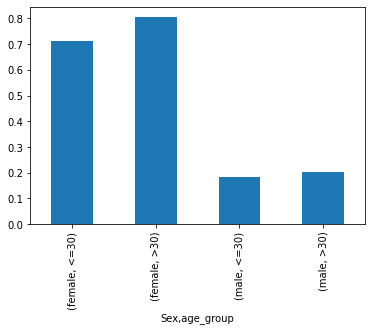

In [14]:
df_plot.plot.bar()

# 5. Выводы:

### Выживаемость выше среди женщин. Как видим на графике, больше всего выжило женщин старше 30 лет. Второе место по числу выживаемости заняли женщины 30 и младше лет. Чем это можно объяснить? Вероятнее всего, тем, что женщин и детей пытались спасти в первую очередь. Для более глубокого анализа можно построить и другие графики. Например, число выживших в зависимости от класса.